In [1]:
import cx_Oracle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dsn_tns = cx_Oracle.makedsn('localhost', '1521', service_name='orcl')
conn = cx_Oracle.connect(user=r'******', password='*****', dsn=dsn_tns)

In [3]:
c = conn.cursor()
c.execute('select * from employees_data') 
for row in c:
    pass
#conn.close()

In [4]:
df_emp=pd.read_sql('''
select * from employees_data
''',conn)
df_emp.head()

,EMP_ID,FIRST_NAME,LAST_NAME,EMAIL,HIREDATE,SALARY,JOB_ID,COMMISSION_PCT,MANAGER_ID,DEPT_ID
0,100,Steven,King,SKING@example.co.uk,2003-06-17,24000,AD_PRES,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR@example.co.uk,2005-09-21,17000,AD_VP,NaN,100.0,95.0
2,102,Lex,DeHaan,LDEHAAN@example.co.uk,2001-01-13,17000,AD_VP,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD@example.co.uk,2006-01-03,9000,IT_PROG,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST@example.co.uk,2007-05-21,6000,IT_PROG,NaN,103.0,60.0


In [5]:
df_dept=pd.read_sql('''
select * from departments
''',conn)
df_dept.head()

,DEPT_ID,DEPT_NAME
0,10,Administration
1,20,Marketing
2,30,Purchasing
3,40,HumanResources
4,50,Shipping


In [6]:
df_comb=pd.merge(df_emp,df_dept,on='DEPT_ID')
df_comb.head()

,EMP_ID,FIRST_NAME,LAST_NAME,EMAIL,HIREDATE,SALARY,JOB_ID,COMMISSION_PCT,MANAGER_ID,DEPT_ID,DEPT_NAME
0,100,Steven,King,SKING@example.co.uk,2003-06-17,24000,AD_PRES,NaN,NaN,90.0,Executive
1,102,Lex,DeHaan,LDEHAAN@example.co.uk,2001-01-13,17000,AD_VP,NaN,100.0,90.0,Executive
2,103,Alexander,Hunold,AHUNOLD@example.co.uk,2006-01-03,9000,IT_PROG,NaN,102.0,60.0,IT
3,104,Bruce,Ernst,BERNST@example.co.uk,2007-05-21,6000,IT_PROG,NaN,103.0,60.0,IT
4,105,David,Austin,DAUSTIN@example.co.uk,2005-06-25,4800,IT_PROG,NaN,103.0,60.0,IT


In [7]:
df_comb.shape

(101, 11)

In [13]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   EMP_ID          101 non-null    int64         
 1   FIRST_NAME      101 non-null    object        
 2   LAST_NAME       101 non-null    object        
 3   EMAIL           101 non-null    object        
 4   HIREDATE        101 non-null    datetime64[ns]
 5   SALARY          101 non-null    int64         
 6   JOB_ID          101 non-null    object        
 7   COMMISSION_PCT  36 non-null     float64       
 8   MANAGER_ID      100 non-null    float64       
 9   DEPT_ID         101 non-null    float64       
 10  DEPT_NAME       101 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 14.5+ KB


In [15]:
df_comb.isna().sum()

EMP_ID             0
FIRST_NAME         0
LAST_NAME          0
EMAIL              0
HIREDATE           0
SALARY             0
JOB_ID             0
COMMISSION_PCT    65
MANAGER_ID         1
DEPT_ID            0
DEPT_NAME          0
dtype: int64

The Red point shows the 

<Figure size 1440x1152 with 0 Axes>

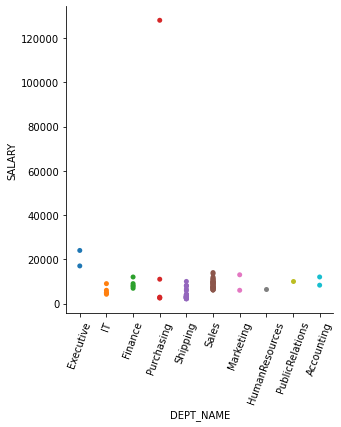

In [8]:
plt.figure(figsize=(20,16))
sns.catplot(x='DEPT_NAME',y='SALARY',jitter=False,data=df_comb)
plt.xticks(rotation=70)
plt.show()

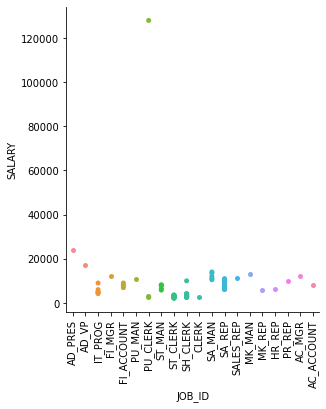

In [9]:
sns.catplot(x='JOB_ID',y='SALARY',jitter=False,data=df_comb);
plt.xticks(rotation=90)
plt.show();

<AxesSubplot:>

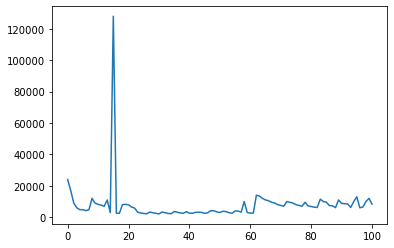

In [10]:
df_comb.SALARY.plot()

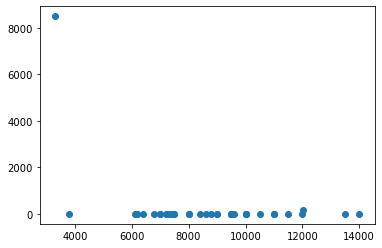

In [11]:
plt.scatter(df_comb.SALARY,df_comb.COMMISSION_PCT)

In [12]:
df_comb.drop(df_comb.SALARY=128000)

SyntaxError: keyword can't be an expression (<ipython-input-12-23cde2450fee>, line 1)

In [16]:
indexNames = df_comb[(df_comb['SALARY'] == 128000)].index
# Delete these row indexes from 
df_comb.drop(indexNames, inplace=True)

In [17]:
indexNames

Int64Index([15], dtype='int64')

<AxesSubplot:>

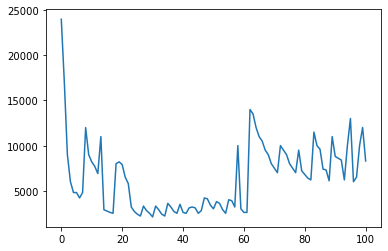

In [18]:
df_comb.SALARY.plot()

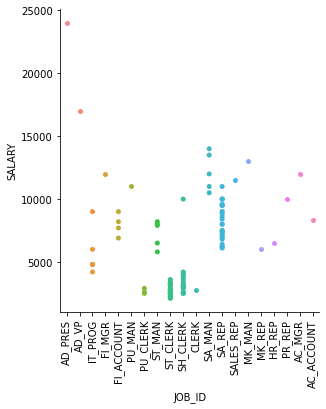

In [19]:
sns.catplot(x='JOB_ID',y='SALARY',jitter=False,data=df_comb);
plt.xticks(rotation=90)
plt.show();

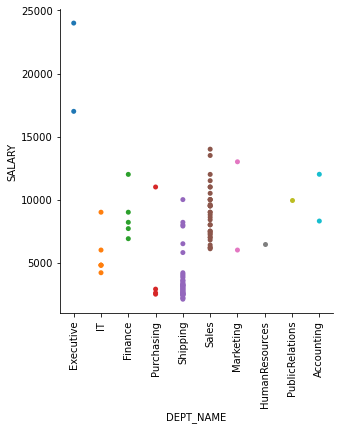

In [20]:
sns.catplot(x='DEPT_NAME',y='SALARY',jitter=False,data=df_comb);
plt.xticks(rotation=90)
plt.show();

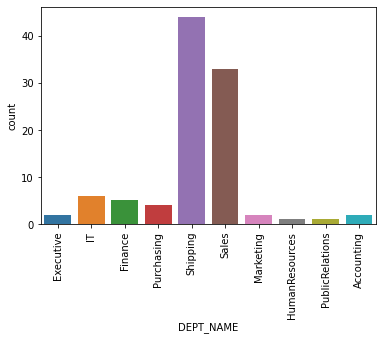

In [24]:
sns.countplot(x='DEPT_NAME',data=df_comb);
plt.xticks(rotation=90);
plt.show()